# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

# LOADING DATASETS 

In [2]:
# Loading the New Customer Data from the excel file

new_customer = pd.read_excel('Raw_data.xlsx' , sheet_name='NewCustomerList')

# Exploratory Data Analysis And Data Cleaning

In [3]:
new_customer.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.81,1.0125,1.265625,1.075781,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.75,0.7500,0.937500,0.796875,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.71,0.7100,0.710000,0.710000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.50,0.6250,0.625000,0.625000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.99,0.9900,1.237500,1.237500,4,4,1.703125


In [4]:
new_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

##### The data-types of the feature columns are fine. However 'Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20' are irrelevent column. Hence it should be dropped.

# Total Records

In [5]:
print("Total records (rows) in the dataset : {}".format(new_customer.shape[0]))
print("Total columns (features) in the dataset : {}".format(new_customer.shape[1]))

Total records (rows) in the dataset : 1000
Total columns (features) in the dataset : 23


# Numeric Columns and Non-Numeric Columns

In [6]:
# select numeric columns
df_numeric = new_customer.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are :")
print(numeric_cols)


# select non-numeric columns
df_non_numeric = new_customer.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are :")
print(non_numeric_cols)

The numeric columns are :
['past_3_years_bike_related_purchases' 'tenure' 'postcode'
 'property_valuation' 'Unnamed: 16' 'Unnamed: 17' 'Unnamed: 18'
 'Unnamed: 19' 'Unnamed: 20' 'Rank' 'Value']
The non-numeric columns are :
['first_name' 'last_name' 'gender' 'DOB' 'job_title'
 'job_industry_category' 'wealth_segment' 'deceased_indicator' 'owns_car'
 'address' 'state' 'country']


## 1. Dropping Irrelevent Columns

##### 'Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20' are irrelevent column. Hence it should be dropped.

In [7]:
new_customer.drop(labels=['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20'], axis=1 , inplace=True)

## 2. Missing Values Check

##### Checking for the presence of any missing values in the dataset. If missing values are present for a particular feature then depending upon the situation the feature may be either dropped (cases when a major amount of data is missing) or an appropiate value will be imputed in the feature column with missing values.

In [8]:
new_customer.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [9]:
# Percentage of missing values

new_customer.isnull().mean()*100  


first_name                              0.0
last_name                               2.9
gender                                  0.0
past_3_years_bike_related_purchases     0.0
DOB                                     1.7
job_title                              10.6
job_industry_category                  16.5
wealth_segment                          0.0
deceased_indicator                      0.0
owns_car                                0.0
tenure                                  0.0
address                                 0.0
postcode                                0.0
state                                   0.0
country                                 0.0
property_valuation                      0.0
Rank                                    0.0
Value                                   0.0
dtype: float64

## 2.1 Last Name

##### Since All customers have a First name, all the customers are identifiable. Hence it is okay for to not have a last name. Filling null last names with "None".

In [10]:
new_customer[new_customer['last_name'].isnull()][['first_name']].isnull().sum()

first_name    0
dtype: int64

In [11]:
new_customer[new_customer['last_name'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
12,Olag,NaN,Male,60,1990-05-13,Human Resources Manager,Telecommunications,Mass Customer,N,No,9,0484 North Avenue,2032,NSW,Australia,11,13,1.609375
58,Whittaker,NaN,Male,64,1966-07-29,Media Manager III,NaN,Mass Customer,N,Yes,8,683 Florence Way,3156,VIC,Australia,5,57,1.375000
87,Kahaleel,NaN,Male,5,1942-11-01,GIS Technical Architect,NaN,High Net Worth,N,No,13,12 Arapahoe Park,2035,NSW,Australia,12,88,1.314844
155,Bill,NaN,Female,74,1963-04-24,Human Resources Assistant II,Property,Mass Customer,N,Yes,19,6704 Pine View Lane,2170,NSW,Australia,9,155,1.200000
202,Glyn,NaN,Male,47,1945-02-13,General Manager,Manufacturing,Affluent Customer,N,Yes,21,67 Bluejay Plaza,2300,NSW,Australia,9,202,1.140625
326,Haleigh,NaN,Female,17,1952-05-19,Senior Sales Associate,Financial Services,Mass Customer,N,Yes,18,49 Jana Point,4503,QLD,Australia,4,326,1.009375
330,Alon,NaN,Male,17,1999-06-23,Accountant IV,NaN,Affluent Customer,N,No,9,770 Crest Line Parkway,4218,QLD,Australia,3,329,1.000000
357,Otis,NaN,Male,59,1971-01-11,Electrical Engineer,Manufacturing,Affluent Customer,N,No,12,04 Oakridge Plaza,2075,NSW,Australia,11,358,0.980000
419,Sherill,NaN,Female,33,1991-12-18,Information Systems Manager,Financial Services,Mass Customer,N,No,3,53 Moulton Avenue,2880,NSW,Australia,1,420,0.913750
442,Theresina,NaN,Female,30,1987-03-01,General Manager,Argiculture,Mass Customer,N,Yes,14,253 Katie Junction,2650,NSW,Australia,2,441,0.901000


In [12]:
new_customer['last_name'].fillna('None', axis=0, inplace=True)

In [13]:
new_customer['last_name'].isnull().sum()

0

##### Currently there are no missing values for Last Name column.

## 2.2 Date of Birth

In [14]:
new_customer[new_customer['DOB'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
59,Normy,Goodinge,U,5,NaT,Associate Professor,IT,Mass Customer,N,No,4,7232 Fulton Parkway,3810,VIC,Australia,5,57,1.375000
226,Hatti,Carletti,U,35,NaT,Legal Assistant,IT,Affluent Customer,N,Yes,11,6 Iowa Center,2519,NSW,Australia,9,226,1.112500
324,Rozamond,Turtle,U,69,NaT,Legal Assistant,IT,Mass Customer,N,Yes,3,57025 New Castle Street,3850,VIC,Australia,3,324,1.010000
358,Tamas,Swatman,U,65,NaT,Assistant Media Planner,Entertainment,Affluent Customer,N,No,5,78 Clarendon Drive,4551,QLD,Australia,8,358,0.980000
360,Tracy,Andrejevic,U,71,NaT,Programmer II,IT,Mass Customer,N,Yes,11,5675 Burning Wood Trail,3030,VIC,Australia,7,361,0.977500
374,Agneta,McAmish,U,66,NaT,Structural Analysis Engineer,IT,Mass Customer,N,No,15,5773 Acker Way,4207,QLD,Australia,6,375,0.960000
434,Gregg,Aimeric,U,52,NaT,Internal Auditor,IT,Mass Customer,N,No,7,72423 Surrey Street,3753,VIC,Australia,5,433,0.906250
439,Johna,Bunker,U,93,NaT,Tax Accountant,IT,Mass Customer,N,Yes,14,3686 Waubesa Way,3065,VIC,Australia,6,436,0.903125
574,Harlene,Nono,U,69,NaT,Human Resources Manager,IT,Mass Customer,N,No,12,0307 Namekagon Crossing,2170,NSW,Australia,7,575,0.796875
598,Gerianne,Kaysor,U,15,NaT,Project Manager,IT,Affluent Customer,N,No,5,882 Toban Lane,2121,NSW,Australia,11,599,0.775000


In [15]:
# Percentage of missing values
new_customer['DOB'].isnull().mean()*100

1.7000000000000002

##### Less than 2% of data has null date of birth. we can remove the records where date of birth is null

In [16]:
# Fetching the index of the records / rows where the DOB is null.

dob_index_drop = new_customer[new_customer['DOB'].isnull()].index
dob_index_drop

Int64Index([ 59, 226, 324, 358, 360, 374, 434, 439, 574, 598, 664, 751, 775,
            835, 883, 904, 984],
           dtype='int64')

In [17]:
new_customer.drop(index=dob_index_drop, axis=0, inplace=True)

In [18]:
new_customer['DOB'].isnull().sum()

0

Currently there are no missing values for DOB.

### Creating Age Column for checking further descripency in data

In [19]:
# Function to find the age of customers as of today.

def age(born):
    today = date.today()
    
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

new_customer['Age'] = new_customer['DOB'].apply(age)

In [20]:
new_customer['Age'].describe()

count    983.000000
mean      51.596134
std       17.054981
min       21.000000
25%       40.000000
50%       51.000000
75%       65.000000
max       84.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age'>

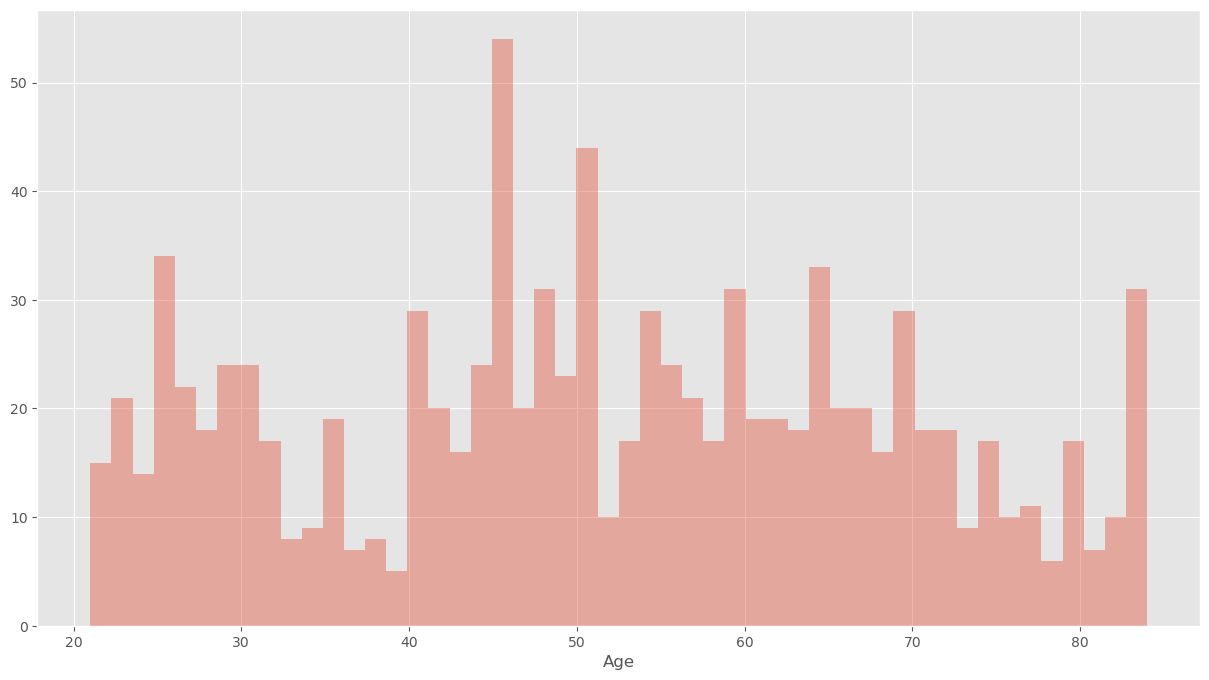

In [21]:
# Viz to find out the Age Distribution
plt.figure(figsize=(15,8))
sns.distplot(new_customer['Age'], kde=False, bins=50)

##### Looking at the age field there is no descripency in the data

## Creating Age Group Column

In [22]:
new_customer['Age Group'] = new_customer['Age'].apply(lambda x : (math.floor(x/10)+1)*10)

<AxesSubplot:xlabel='Age Group'>

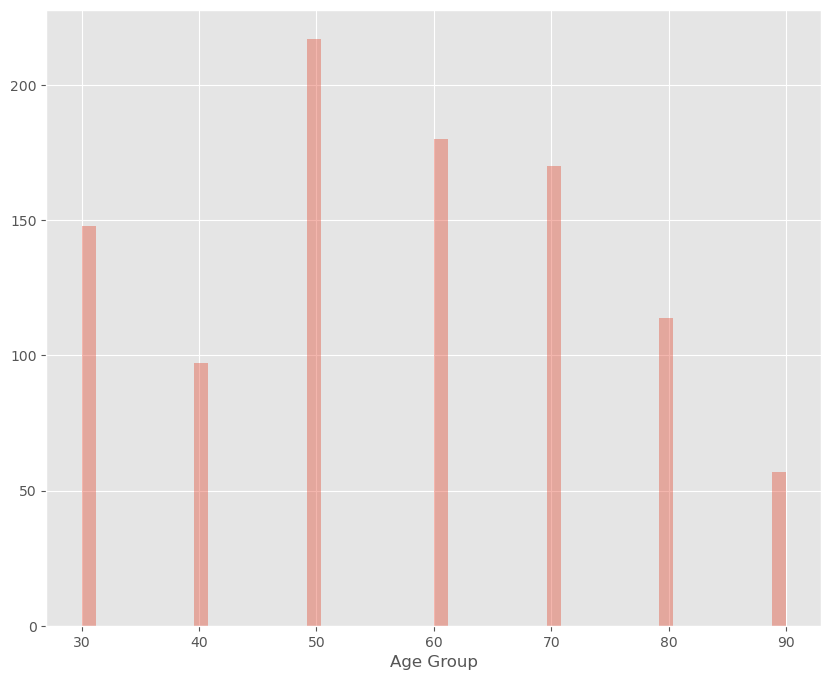

In [23]:
# Viz to find out the Age Group Distribution
plt.figure(figsize=(10,8))
sns.distplot(new_customer['Age Group'], kde=False, bins=50)

#### The highest number of New Customers are from the Age Group 50-59 

## 2.3 Job Title 

In [24]:
new_customer[new_customer['job_title'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,Age Group
15,Dukie,Swire,Male,88,1954-03-31,NaN,Manufacturing,Affluent Customer,N,Yes,5,64 Granby Parkway,2500,NSW,Australia,8,16,1.562500,69,70
25,Rourke,Gillbard,Male,11,1945-08-03,NaN,Property,Mass Customer,N,No,17,75 Cordelia Trail,4817,QLD,Australia,4,26,1.468750,77,80
29,Rhona,De Freyne,Female,45,1960-11-22,NaN,Health,High Net Worth,N,No,8,11184 East Drive,3056,VIC,Australia,10,30,1.460938,62,70
30,Sharron,Claibourn,Female,62,1980-01-26,NaN,Financial Services,High Net Worth,N,Yes,17,555 Hermina Avenue,2280,NSW,Australia,8,30,1.460938,43,50
37,Mitchell,MacCague,Male,58,1979-04-11,NaN,Manufacturing,Mass Customer,N,No,15,240 Acker Avenue,3190,VIC,Australia,8,38,1.437500,44,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,Candy,None,Female,23,1977-12-08,NaN,Financial Services,Mass Customer,N,No,6,59252 Maryland Drive,3500,VIC,Australia,3,951,0.450500,45,50
953,Noami,Cokly,Female,74,1962-09-17,NaN,Manufacturing,Mass Customer,N,Yes,15,2886 Buena Vista Terrace,2038,NSW,Australia,11,954,0.450000,60,70
971,Frieda,Tavinor,Female,43,1999-03-04,NaN,NaN,Affluent Customer,N,No,10,7 Mallory Lane,3064,VIC,Australia,6,972,0.430000,24,30
972,Ellwood,Budden,Male,82,1998-06-03,NaN,Health,Mass Customer,N,Yes,11,79907 Randy Center,2192,NSW,Australia,10,972,0.430000,24,30


In [25]:
round(new_customer['job_title'].isnull().mean()*100)

11

#### Since percentage of missing values for Job Title is 11%. We will replace null values with Missing.

In [26]:
new_customer['job_title'].fillna('missing', axis=0, inplace=True)

In [27]:
new_customer['job_title'].isnull().sum()

0

Currently there are no missing values for Job Title Column.

## 2.4 Job Industry Category

In [28]:
new_customer[new_customer['job_industry_category'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,Age Group
22,Otis,Ottey,Male,26,1998-02-05,Quality Engineer,NaN,Mass Customer,N,No,3,1562 Merchant Street,4744,QLD,Australia,4,23,1.500000,25,30
23,Tabbatha,Averill,Female,5,1977-12-17,Quality Control Specialist,NaN,Affluent Customer,N,Yes,13,663 8th Parkway,2257,NSW,Australia,8,23,1.500000,45,50
33,Mikel,McNess,Male,71,1981-09-22,Nurse,NaN,Mass Customer,N,No,9,3 Pleasure Drive,4122,QLD,Australia,9,32,1.453125,41,50
36,Farlie,Petford,Male,76,1968-03-25,Recruiting Manager,NaN,High Net Worth,N,No,13,2330 Butternut Trail,2017,NSW,Australia,10,36,1.447656,55,60
43,Corinna,Suggey,Female,52,1966-09-18,Design Engineer,NaN,Affluent Customer,N,No,9,938 Ilene Road,2761,NSW,Australia,8,44,1.421094,56,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Blondell,Dibdall,Female,62,1967-01-03,Programmer III,NaN,Mass Customer,N,No,4,34 Bunting Pass,3048,VIC,Australia,4,960,0.442000,56,60
971,Frieda,Tavinor,Female,43,1999-03-04,missing,NaN,Affluent Customer,N,No,10,7 Mallory Lane,3064,VIC,Australia,6,972,0.430000,24,30
975,Amby,Bodega,Male,63,1968-06-12,Recruiter,NaN,Affluent Customer,N,Yes,17,669 Declaration Street,3810,VIC,Australia,6,974,0.425000,54,60
980,Tyne,Anshell,Female,71,1992-04-08,Mechanical Systems Engineer,NaN,Mass Customer,N,Yes,3,93 Sutherland Terrace,2560,NSW,Australia,8,979,0.416500,31,40


In [29]:
round(new_customer['job_industry_category'].isnull().mean()*100)

17

#### Since Percentage of missing Job Industry Category is 17%. We will replace null values with Missing.

In [30]:
new_customer['job_industry_category'].fillna('missing', axis=0, inplace=True)

In [31]:
new_customer['job_industry_category'].isnull().sum()

0

Currently there are no Missing values for Job Industry Category column.

#### Finally there are no Missing Values in the dataset.

In [32]:
new_customer.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
Age                                    0
Age Group                              0
dtype: int64

In [33]:
print("Total records after removing Missing Values: {}".format(new_customer.shape[0]))

Total records after removing Missing Values: 983


# 3. Inconsistency Check in Data

We will check whether there is inconsistent data / typo error data is present in the categorical columns.
The columns to be checked are :                                                                                            'gender', 'wealth_segment' ,'deceased_indicator', 'owns_car', 'state', 'postcode', 'address', 'country' 

### 3.1 Gender

In [34]:
new_customer['gender'].value_counts()

Female    513
Male      470
Name: gender, dtype: int64

There is no inconsistent data in gender column.

### 3.2 Wealth Segment

In [35]:
new_customer['wealth_segment'].value_counts()

Mass Customer        499
High Net Worth       249
Affluent Customer    235
Name: wealth_segment, dtype: int64

There is no inconsistent data in wealth_segment column.

### 3.3 Deceased Indicator

In [36]:
new_customer['deceased_indicator'].value_counts()

N    983
Name: deceased_indicator, dtype: int64

There is no inconsistent data in deceased_indicator column.

### 3.4 Owns a Car

In [37]:
new_customer['owns_car'].value_counts()

No     497
Yes    486
Name: owns_car, dtype: int64

There is no inconsistent data in 'owns_car' column.

### 3.5 State

In [38]:
new_customer['state'].value_counts()

NSW    499
VIC    258
QLD    226
Name: state, dtype: int64

There is no inconsistent data in 'state' column.

### 3.6 Country

In [39]:
new_customer['country'].value_counts()

Australia    983
Name: country, dtype: int64

There is no inconsistent data in 'country' column.

### 3.7 Postcode

In [40]:
new_customer[['postcode', 'state']].drop_duplicates().sort_values('state')

,postcode,state
164,2073,NSW
202,2300,NSW
616,2049,NSW
204,2429,NSW
615,2070,NSW
...,...,...
234,3429,VIC
589,3037,VIC
604,3129,VIC
245,3134,VIC


There is no inconsistent data in 'postcode' column.

### 3.8 Address

In [41]:
new_customer[['address', 'postcode','state','country']].sort_values('address')

,address,postcode,state,country
721,0 Bay Drive,2750,NSW,Australia
138,0 Dexter Parkway,2380,NSW,Australia
624,0 Emmet Trail,4128,QLD,Australia
300,0 Esker Avenue,4019,QLD,Australia
685,0 Express Lane,2142,NSW,Australia
...,...,...,...,...
308,99 Westend Court,2287,NSW,Australia
336,990 Hoffman Avenue,3029,VIC,Australia
796,99376 Namekagon Street,3101,VIC,Australia
583,9940 Manley Drive,2574,NSW,Australia


There is no inconsistent data in 'address' column.

### 3.9 Tenure

In [43]:
new_customer['tenure'].describe()

count    983.000000
mean      11.459817
std        5.006123
min        1.000000
25%        8.000000
50%       11.000000
75%       15.000000
max       22.000000
Name: tenure, dtype: float64

There is no inconsistent data in tenure column. The distribution of tenure looks fine.

<AxesSubplot:xlabel='tenure', ylabel='Density'>

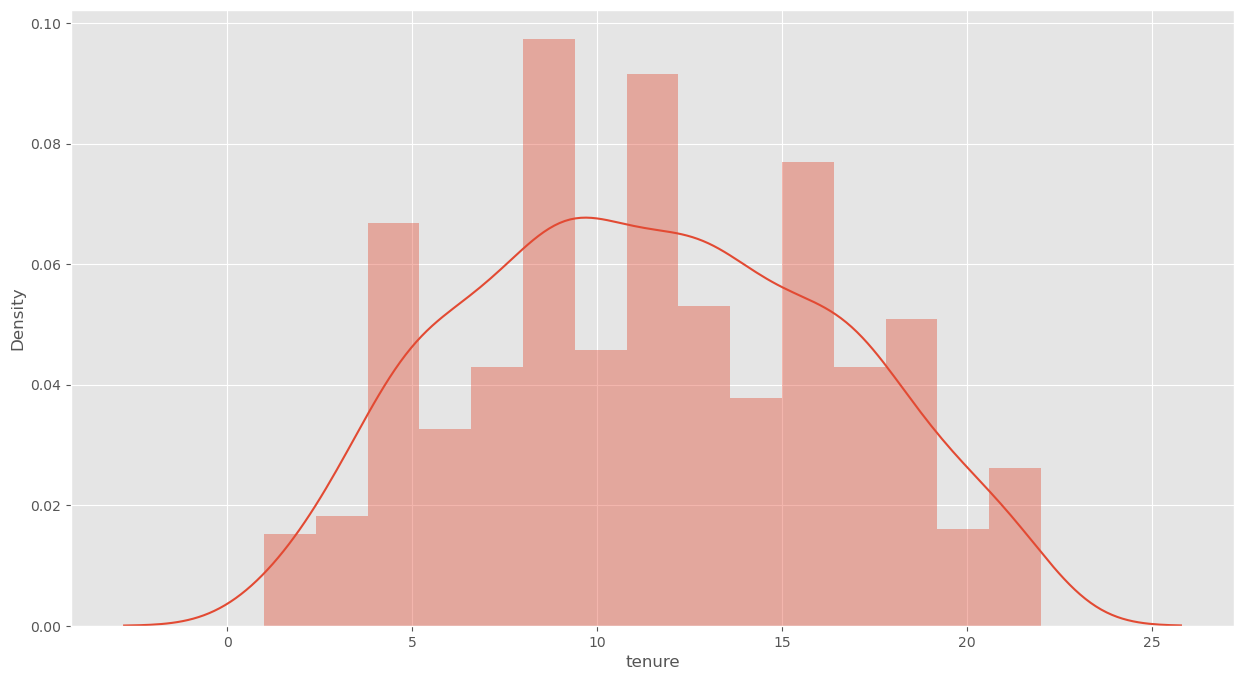

In [45]:
# Distributon of tenure

plt.figure(figsize=(15,8))
sns.distplot(new_customer['tenure'])

# 4. Duplication Checks

We need to ensure that there is no duplication of records in the dataset. This may lead to error in data analysis due to poor data quality. If there are duplicate rows of data then we need to drop such records.
For checking for duplicate records we need to firstly remove the primary key column of the dataset then apply drop_duplicates() function provided by Python.



In [46]:
new_customer_dedupped = new_customer.drop_duplicates()

print("Number of records after removing customer_id (pk), duplicates : {}".format(new_customer_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(new_customer.shape[0]))

Number of records after removing customer_id (pk), duplicates : 983
Number of records in original dataset : 983


#### Since both the numbers are same. There are no duplicate records in the dataset.

# 5. Exporting the Cleaned New Customers Data Set to csv

In [47]:
new_customer.to_csv('NewCustomerList_Cleaned.csv', index=False)